In [67]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, multilabel_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

## 1. Problem Statement

In [ ]:
To Predict patient is having diabetes or not by using required parameteres

'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
'DiabetesPedigreeFunction', 'Age'

## 2. Data Gathering

In [4]:
df_diab = pd.read_csv('diabetes.csv')
df_diab.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df_diab.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1


## EDA

In [6]:
df_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [7]:
df_diab.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 3.1 Glucose

<AxesSubplot:xlabel='Glucose'>

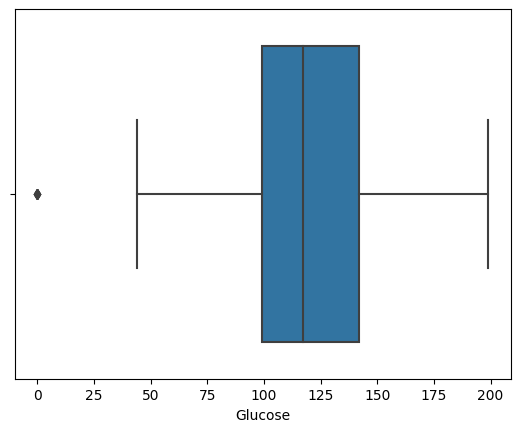

In [8]:
sns.boxplot(df_diab['Glucose'])

<AxesSubplot:>

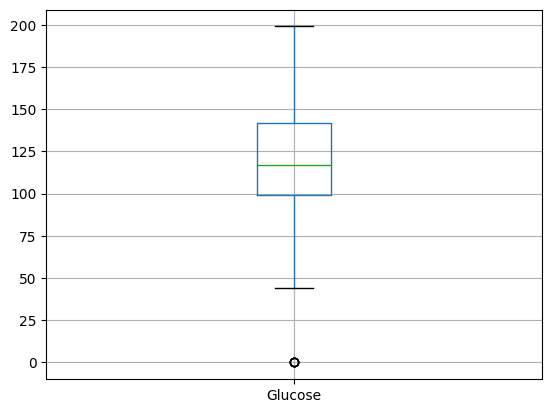

In [10]:
df_diab[['Glucose']].boxplot()

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

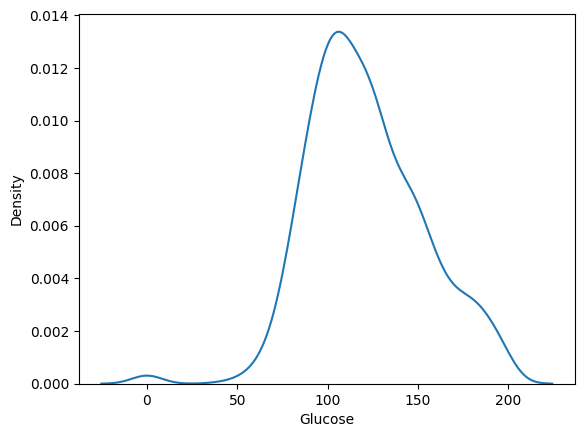

In [11]:
sns.kdeplot(df_diab['Glucose'])

In [12]:
df_diab['Glucose'] = np.where(df_diab['Glucose'] < 25, df_diab['Glucose'].median(), df_diab['Glucose'])

### 3.2 BloodPressure

<AxesSubplot:xlabel='BloodPressure'>

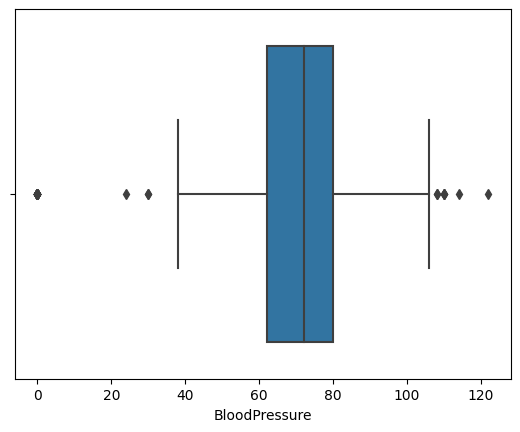

In [13]:
sns.boxplot(df_diab['BloodPressure'])

In [17]:
df_diab[~df_diab['BloodPressure'].between(35,105)].shape

(48, 8)

In [18]:
df_diab['BloodPressure'] = np.where(~df_diab['BloodPressure'].between(35,105), df_diab['BloodPressure'].median(),
                                   df_diab['BloodPressure'])

<AxesSubplot:xlabel='BloodPressure'>

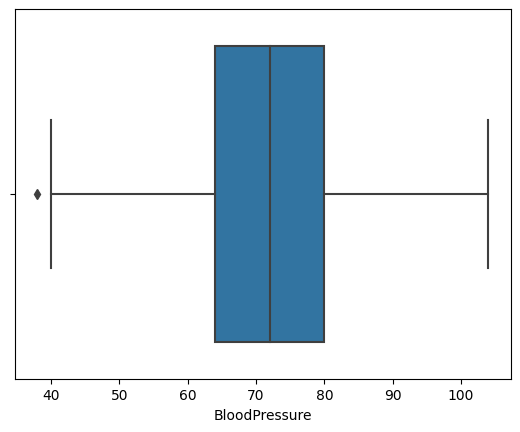

In [19]:
sns.boxplot(df_diab['BloodPressure'])

### 3.3 SkinThickness

<AxesSubplot:xlabel='SkinThickness'>

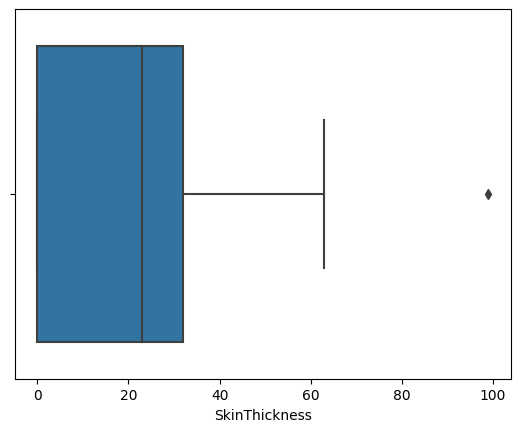

In [20]:
sns.boxplot(df_diab['SkinThickness'])

In [21]:
df_diab['SkinThickness'] = np.where(df_diab['SkinThickness'] > 65, df_diab['SkinThickness'].median(), df_diab['SkinThickness'])

### 3.4 Insulin

<AxesSubplot:xlabel='Insulin'>

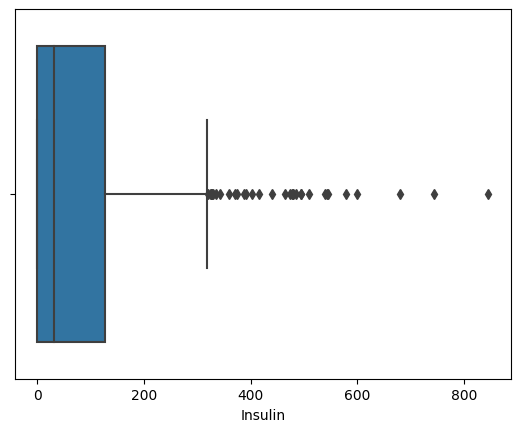

In [22]:
sns.boxplot(df_diab['Insulin'])

In [23]:
df_diab[df_diab['Insulin'] > 325].shape

(30, 8)

In [24]:
df_diab['Insulin'] = np.where(df_diab['Insulin']>325, df_diab['Insulin'].median(), df_diab['Insulin'])

### 3.5 BMI

<AxesSubplot:xlabel='BMI'>

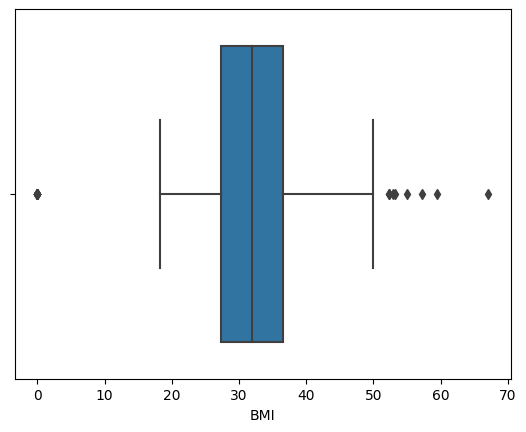

In [26]:
sns.boxplot(df_diab['BMI'])

In [27]:
df_diab['BMI'] = np.where(~df_diab['BMI'].between(15,50), df_diab['BMI'].median(),df_diab['BMI'])

### 3.6 DiabetesPedigreeFunction

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

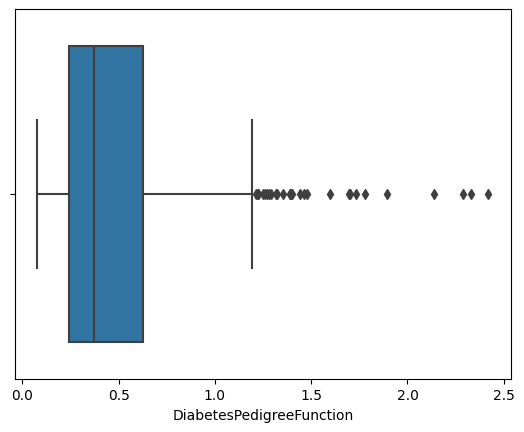

In [28]:
sns.boxplot(df_diab['DiabetesPedigreeFunction'])

In [29]:
df_diab['DiabetesPedigreeFunction'] = np.where(df_diab['DiabetesPedigreeFunction']>=1.2, 
                                               df_diab['DiabetesPedigreeFunction'].median(), 
                                               df_diab['DiabetesPedigreeFunction'])

### 3.7 Age

<AxesSubplot:xlabel='Age'>

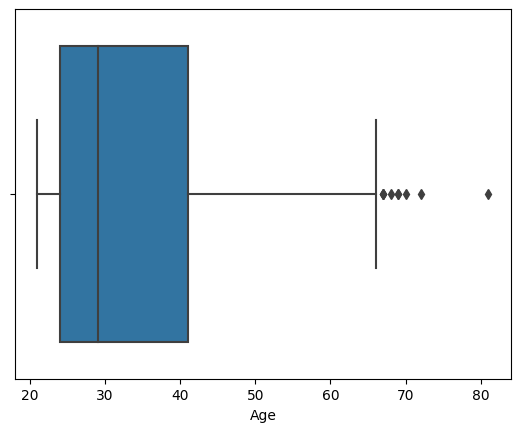

In [30]:
sns.boxplot(df_diab['Age'])

In [31]:
df_diab['Age'] = np.where(df_diab['Age']>=66, df_diab['Age'].median(), df_diab['Age'])

### 3.8 Outcome

In [33]:
df_diab['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [34]:
df_diab['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

<AxesSubplot:ylabel='Outcome'>

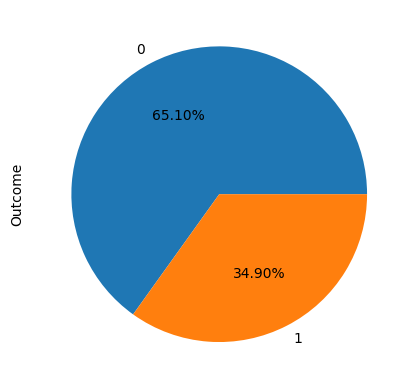

In [37]:
df_diab['Outcome'].value_counts().plot(kind='pie', autopct ='%1.2f%%')

## 4. Feature Engineering

## 5. Feature Selection

#### 5.1 VIF

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
x = df_diab.drop('Outcome', axis = 1)
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,50.0,35.0,0.0,33.6,0.6270,50.0
1,85.0,66.0,29.0,0.0,26.6,0.3510,31.0
2,183.0,64.0,0.0,0.0,23.3,0.6720,52.0
3,150.0,66.0,23.0,94.0,28.1,0.1670,21.0
4,150.0,40.0,35.0,168.0,43.1,0.3725,33.0
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.1710,63.0
764,122.0,70.0,27.0,0.0,36.8,0.3400,27.0
765,121.0,72.0,23.0,112.0,26.2,0.2450,30.0
766,126.0,60.0,0.0,0.0,30.1,0.3490,47.0


In [40]:
variance_inflation_factor(x.values, 1)

34.14955721193949

<AxesSubplot:>

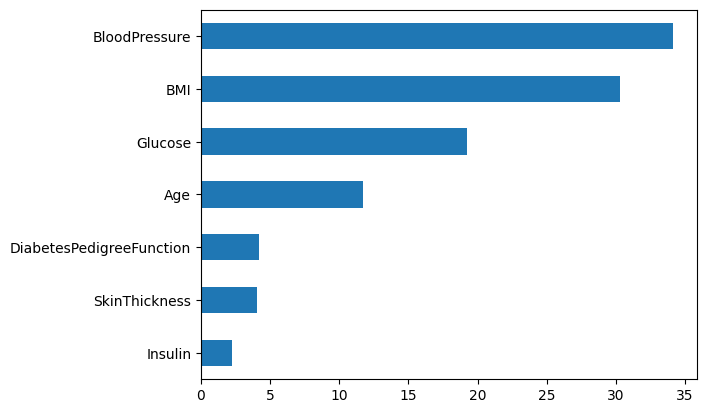

In [44]:
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.values, i)
    vif_list.append(round(vif, 2))
    
s1 = pd.Series(vif_list, index = x.columns)
s1.sort_values().plot(kind='barh')

In [47]:
df_diab.corr().tail(1)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.489446,0.16432,0.067344,0.091948,0.300615,0.151994,0.267032,1.0


## 6. Model Building

### 6.1 Train Test Split

In [48]:
x = df_diab.drop('Outcome',axis=1)
y = df_diab['Outcome']

In [49]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [50]:
y.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [51]:
500/(500+268)

0.6510416666666666

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2, stratify=y)

In [53]:
268*0.8

214.4

In [ ]:
Training >> 80%
Testing >> 20 %

In [59]:
y_test.value_counts(normalize=True)

0    0.649351
1    0.350649
Name: Outcome, dtype: float64

In [60]:
y_train.value_counts(normalize=True)

0    0.651466
1    0.348534
Name: Outcome, dtype: float64

In [63]:
x_test.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
615,106.0,72.0,0.0,0.0,25.8,0.207,27.0
80,113.0,44.0,13.0,0.0,22.4,0.140,22.0
148,147.0,78.0,0.0,0.0,33.7,0.218,65.0
132,170.0,64.0,37.0,225.0,34.5,0.356,30.0
501,84.0,72.0,32.0,0.0,37.2,0.267,28.0


In [64]:
y_test.head()

615    0
80     0
148    0
132    1
501    0
Name: Outcome, dtype: int64

## Model Instatiation

In [68]:
log_clf = LogisticRegression()
log_clf.fit(x_train, y_train)

LogisticRegression()

In [69]:
log_clf.coef_

array([[ 3.62365969e-02, -1.88548740e-03, -2.00369242e-03,
        -7.76581457e-04,  1.00156556e-01,  1.01286114e+00,
         4.26024640e-02]])

## Evaluation

In [73]:
def evaluation(string, model, ind_var, act):
    print(string.center(50, '*'))
    pred = model.predict(ind_var)
    
    acc_score = accuracy_score(act, pred)
    print('Accuracy Score :', acc_score)
    print('**'*20)
    
    cnf_matrix = confusion_matrix(act, pred)
    print('Confusion Matrix: \n', cnf_matrix)
    print('**'*20)
    
    clf_report = classification_report(act, pred)
    print('Classification Report : \n', clf_report)
    print('**'*20)
    
    return pred
    
y_pred = evaluation('Test Data Evaluation',log_clf, x_test, y_test)    

***************Test Data Evaluation***************
Accuracy Score : 0.7532467532467533
****************************************
Confusion Matrix: 
 [[89 11]
 [27 27]]
****************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.89      0.82       100
           1       0.71      0.50      0.59        54

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154

****************************************


In [ ]:
0 >> neg
1 >> pos

TN FP
FN TP


     0    1
0    89  11
1    27  27


acc = (89+27)/154
acc

In [74]:
precision =  27/(27+11)          # Precision for class 1
precision

0.7105263157894737

In [75]:
precision =  89/(89+27)          # Precision for class 0
precision

0.7672413793103449

In [76]:
recall =  27/(27+27)          # recall for class 1
recall

0.5

In [77]:
recall =  89/(89+11)          # recall for class 0
recall

0.89

In [78]:
f1 = (2 * 0.71 *0.5)/(0.71+0.5)                            # f1 for class 1
f1

0.5867768595041322

In [79]:
f1 = (2 * 0.76 *0.89)/(0.76+0.89)                            # f1 for class 0
f1

0.8198787878787879

In [80]:
y_pred_train = evaluation('Train Data Evaluation',log_clf, x_train, y_train)    

**************Train Data Evaluation***************
Accuracy Score : 0.7801302931596091
****************************************
Confusion Matrix: 
 [[350  50]
 [ 85 129]]
****************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       400
           1       0.72      0.60      0.66       214

    accuracy                           0.78       614
   macro avg       0.76      0.74      0.75       614
weighted avg       0.78      0.78      0.77       614

****************************************


## 8. Macro avg

In [ ]:
Macro avg >> Treat evry class equally

Balanced data

if working with imbalance data >> all the classes are equally

Calculates arithmatic mean(simple mean)
If uses f1 score

In [81]:
(0.84+ 0.66)/2

0.75

## Weighted avg

In [ ]:
Weighted avg >> Imbalnce Data

if working with imabalnce data >> where classes need to be given more weights

In [ ]:
      f1    support      support proportion   weighted avg
0    0.84     400              0.65
1    0.66     214              0.35           (0.84*0.65) + (0.66*0.35)

In [82]:
(0.84*0.65) + (0.66*0.35)

0.777

In [83]:
(0.88*0.65) + (0.60*0.35)

0.782

<AxesSubplot:>

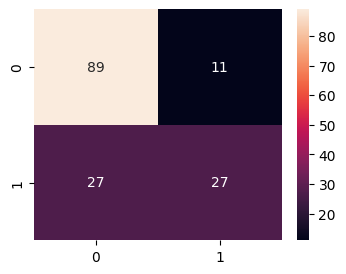

In [87]:
plt.figure(figsize=(4,3))
cnf_matrix =  confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True)

<Figure size 400x300 with 0 Axes>

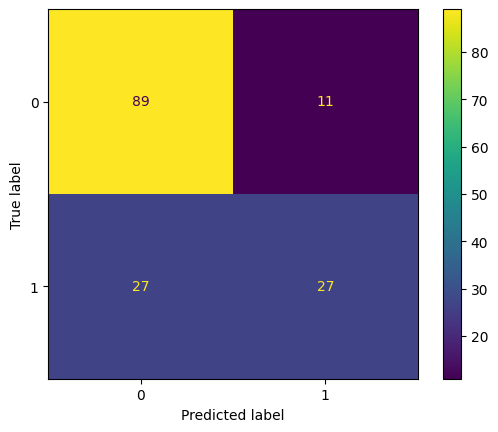

In [88]:
plt.figure(figsize=(4,3))
plot_confusion_matrix(log_clf, x_test, y_test)

## AUC ROC Curve

In [89]:
y_pred_proba = log_clf.predict_proba(x_test)
y_pred_proba

array([[0.92416803, 0.07583197],
       [0.94487131, 0.05512869],
       [0.19856529, 0.80143471],
       [0.32408304, 0.67591696],
       [0.89250026, 0.10749974],
       [0.88735133, 0.11264867],
       [0.89177971, 0.10822029],
       [0.31516922, 0.68483078],
       [0.77708358, 0.22291642],
       [0.56045341, 0.43954659],
       [0.01906815, 0.98093185],
       [0.55912337, 0.44087663],
       [0.66113356, 0.33886644],
       [0.30598521, 0.69401479],
       [0.42018208, 0.57981792],
       [0.15045341, 0.84954659],
       [0.89577988, 0.10422012],
       [0.86510721, 0.13489279],
       [0.93564801, 0.06435199],
       [0.74340694, 0.25659306],
       [0.47899802, 0.52100198],
       [0.84041803, 0.15958197],
       [0.42887217, 0.57112783],
       [0.30041061, 0.69958939],
       [0.98394242, 0.01605758],
       [0.74780057, 0.25219943],
       [0.52292926, 0.47707074],
       [0.1688804 , 0.8311196 ],
       [0.54570588, 0.45429412],
       [0.29980557, 0.70019443],
       [0.

In [90]:
y_pred[:5]

array([0, 0, 1, 1, 0], dtype=int64)

In [ ]:
thresh = 0.5  
            0            1
       [0.92416803, 0.07583197],     >> Class 0
       [0.94487131, 0.05512869],     >> CLass 0
       [0.19856529, 0.80143471],     >> Class 1
       [0.32408304, 0.67591696],
       [0.89250026, 0.10749974],
       [0.88735133, 0.11264867],
       [0.89177971, 0.10822029],
       [0.31516922, 0.68483078],     >> Class 1
       [0.77708358, 0.22291642],     >> Class 0
       [0.56045341, 0.43954659],     >> Class 0
       [0.01906815, 0.98093185]

In [ ]:
thresh = 0.6
            0            1
       [0.92416803, 0.07583197],     >> Class 0
       [0.94487131, 0.05512869],     >> CLass 0
       [0.19856529, 0.80143471],     >> Class 1
       [0.32408304, 0.67591696],
       [0.89250026, 0.10749974],
       [0.88735133, 0.11264867],
       [0.89177971, 0.10822029],
       [0.31516922, 0.68483078],     >> Class 1
       [0.77708358, 0.22291642],     >> Class 0
       [0.56045341, 0.43954659],     >> Class 0
       [0.01906815, 0.98093185]

In [92]:
y_pred_proba[:,1]

array([0.07583197, 0.05512869, 0.80143471, 0.67591696, 0.10749974,
       0.11264867, 0.10822029, 0.68483078, 0.22291642, 0.43954659,
       0.98093185, 0.44087663, 0.33886644, 0.69401479, 0.57981792,
       0.84954659, 0.10422012, 0.13489279, 0.06435199, 0.25659306,
       0.52100198, 0.15958197, 0.57112783, 0.69958939, 0.01605758,
       0.25219943, 0.47707074, 0.8311196 , 0.45429412, 0.70019443,
       0.32344887, 0.15854392, 0.09126714, 0.77042682, 0.23618998,
       0.32965545, 0.04286614, 0.16646326, 0.05038704, 0.05154509,
       0.57300447, 0.22265781, 0.28284494, 0.67831266, 0.28742028,
       0.36567802, 0.45560159, 0.19959696, 0.01729309, 0.20536679,
       0.27713085, 0.13675961, 0.64288354, 0.10062688, 0.75565647,
       0.36503268, 0.07057837, 0.03773927, 0.38578385, 0.07135269,
       0.16587757, 0.08429971, 0.22733687, 0.2345223 , 0.60499785,
       0.39609858, 0.19454161, 0.64839593, 0.64933759, 0.07555895,
       0.67622376, 0.21923803, 0.70280521, 0.07672924, 0.89311

In [93]:
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba[:,1])
thresh

array([1.98093185, 0.98093185, 0.9422866 , 0.93614674, 0.8311196 ,
       0.78489216, 0.72003531, 0.70019443, 0.69958939, 0.69401479,
       0.65593659, 0.64933759, 0.64839593, 0.64288354, 0.58321638,
       0.57981792, 0.52185196, 0.47963614, 0.47648427, 0.4399063 ,
       0.43954659, 0.42467508, 0.41157602, 0.40603024, 0.39609858,
       0.39003235, 0.38578385, 0.36784307, 0.36567802, 0.36503268,
       0.32965545, 0.32344887, 0.32099072, 0.30409366, 0.29222445,
       0.27713085, 0.25659306, 0.2345223 , 0.22733687, 0.21923803,
       0.21381913, 0.19959696, 0.19473091, 0.19454161, 0.18568521,
       0.17525811, 0.17215304, 0.16588704, 0.16587757, 0.15854392,
       0.1565122 , 0.14503723, 0.14106223, 0.13489279, 0.12708146,
       0.10749974, 0.10535384, 0.01148848])

In [94]:
fpr

array([0.  , 0.  , 0.  , 0.01, 0.01, 0.04, 0.04, 0.06, 0.06, 0.07, 0.07,
       0.08, 0.08, 0.09, 0.09, 0.1 , 0.1 , 0.12, 0.12, 0.18, 0.18, 0.19,
       0.19, 0.2 , 0.2 , 0.21, 0.21, 0.22, 0.22, 0.23, 0.23, 0.24, 0.24,
       0.26, 0.26, 0.3 , 0.3 , 0.35, 0.35, 0.39, 0.39, 0.43, 0.43, 0.44,
       0.44, 0.46, 0.46, 0.49, 0.49, 0.51, 0.51, 0.53, 0.53, 0.56, 0.56,
       0.62, 0.62, 1.  ])

In [95]:
tpr

array([0.        , 0.01851852, 0.03703704, 0.03703704, 0.14814815,
       0.14814815, 0.24074074, 0.24074074, 0.25925926, 0.25925926,
       0.35185185, 0.35185185, 0.37037037, 0.37037037, 0.44444444,
       0.44444444, 0.5       , 0.5       , 0.53703704, 0.53703704,
       0.55555556, 0.55555556, 0.57407407, 0.57407407, 0.59259259,
       0.59259259, 0.61111111, 0.61111111, 0.62962963, 0.62962963,
       0.66666667, 0.66666667, 0.68518519, 0.68518519, 0.72222222,
       0.72222222, 0.75925926, 0.75925926, 0.7962963 , 0.7962963 ,
       0.81481481, 0.81481481, 0.83333333, 0.83333333, 0.87037037,
       0.87037037, 0.88888889, 0.88888889, 0.90740741, 0.90740741,
       0.92592593, 0.92592593, 0.96296296, 0.96296296, 0.98148148,
       0.98148148, 1.        , 1.        ])

## ROC Curve

Text(0, 0.5, 'True Positive Rate')

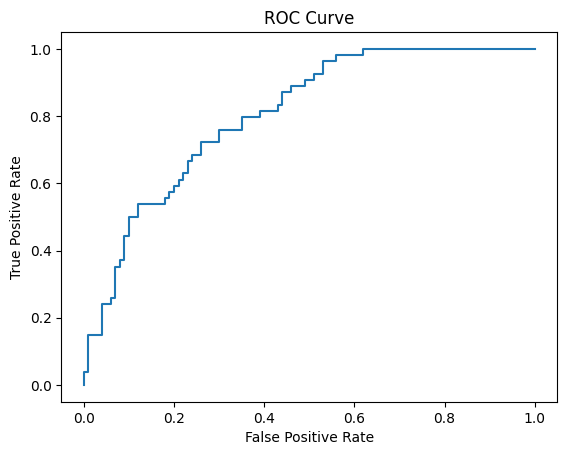

In [99]:
plt.title('ROC Curve')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [100]:
auc_score = roc_auc_score(y_test, y_pred_proba[:,1])
auc_score

0.8042592592592592

In [103]:
# Prob to belonging to 1
value_pred = []

for i in y_pred_proba[:,1]:
    if i >= 0.6:
        value_pred.append(1)
    else:
        value_pred.append(0)
    

In [105]:
arr = np.array(value_pred)

confusion_matrix(y_test, arr)

array([[91,  9],
       [32, 22]], dtype=int64)

In [107]:
print(classification_report(y_test, arr))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82       100
           1       0.71      0.41      0.52        54

    accuracy                           0.73       154
   macro avg       0.72      0.66      0.67       154
weighted avg       0.73      0.73      0.71       154



In [108]:
# Prob to belonging to 1
value_pred = []

for i in y_pred_proba[:,1]:
    if i >= 0.45:
        value_pred.append(1)
    else:
        value_pred.append(0)
    
arr = np.array(value_pred)

confusion_matrix(y_test, arr)

array([[84, 16],
       [25, 29]], dtype=int64)

In [109]:
print(classification_report(y_test, arr))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       100
           1       0.64      0.54      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154



In [111]:
y_pred_proba[22:23]

array([[0.42887217, 0.57112783]])

In [112]:
result = y_pred_proba[22:23]
result[0,1]

0.5711278257765363

In [113]:
def get_pred_class(threshold, result):
    prob = result[0,1]
    if prob >= threshold:
        return 'Class1'
    
    else:
        return 'Class0'
    
result = y_pred_proba[22:23]    

threshold = 0.5
pred_class = get_pred_class(threshold, result)
print('Precited class is: ', pred_class)

Precited class is:  Class1


In [114]:
def get_pred_class(threshold, result):
    prob = result[0,1]
    if prob >= threshold:
        return 'Class1'
    
    else:
        return 'Class0'
    
result = y_pred_proba[22:23]    

threshold = 0.6
pred_class = get_pred_class(threshold, result)
print('Precited class is: ', pred_class)

Precited class is:  Class0


## Test Model on single Row

In [117]:
x.head(1).T

,0
Glucose,148.000
BloodPressure,50.000
SkinThickness,35.000
Insulin,0.000
BMI,33.600
DiabetesPedigreeFunction,0.627
Age,50.000


In [125]:
Glucose =143.000
BloodPressure=53.000
SkinThickness=38.000
Insulin=0.2
BMI=28.600
DiabetesPedigreeFunction=0.6
Age=47

test_array = np.array([Glucose,BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age], ndmin = 2)
# test_array
pred_class = log_clf.predict(test_array)[0]
print('Predicted Class is :', pred_class)   # Threshold = 0.5

Predicted Class is : 1


In [126]:
Glucose =143.000
BloodPressure=53.000
SkinThickness=38.000
Insulin=0.2
BMI=28.600
DiabetesPedigreeFunction=0.6
Age=47

test_array = np.array([Glucose,BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age], ndmin = 2)
# test_array
pred_class = log_clf.predict(test_array)[0]
# print('Predicted Class is :', pred_class)   # Threshold = 0.5

def get_pred_class(threshold, result):
    prob = result[0,1]
    if prob >= threshold:
        return 'Class1'
    
    else:
        return 'Class0'
    
result = y_pred_proba[22:23]    

threshold = 0.6
pred_class = get_pred_class(threshold, result)
print('Precited class is: ', pred_class)

Precited class is:  Class0


In [127]:
Glucose =143.000
BloodPressure=53.000
SkinThickness=38.000
Insulin=0.2
BMI=28.600
DiabetesPedigreeFunction=0.6
Age=47

test_array = np.array([Glucose,BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age], ndmin = 2)
# test_array
pred_class = log_clf.predict(test_array)[0]
# print('Predicted Class is :', pred_class)   # Threshold = 0.5

def get_pred_class(threshold, result):
    prob = result[0,1]
    if prob >= threshold:
        return 'Class1'
    
    else:
        return 'Class0'
    
result = y_pred_proba[22:23]    
print(result)
threshold = 0.6
pred_class = get_pred_class(threshold, result)
print('Precited class is: ', pred_class)

[[0.42887217 0.57112783]]
Precited class is:  Class0


In [128]:
Glucose =143.000
BloodPressure=53.000
SkinThickness=38.000
Insulin=0.2
BMI=28.600
DiabetesPedigreeFunction=0.6
Age=47

test_array = np.array([Glucose,BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age], ndmin = 2)
# test_array
pred_class = log_clf.predict(test_array)[0]
# print('Predicted Class is :', pred_class)   # Threshold = 0.5

def get_pred_class(threshold, result):
    prob = result[0,1]
    if prob >= threshold:
        return 'Class1'
    
    else:
        return 'Class0'
    
result = y_pred_proba[22:23]    
print(result)
threshold = 0.55
pred_class = get_pred_class(threshold, result)
print('Precited class is: ', pred_class)

[[0.42887217 0.57112783]]
Precited class is:  Class1


In [ ]:
Why project actually exist:
    Revunue Loss(optimization)
    Revenue Generation(Maximization)
    Manpower Management
    Time Management
    Process Management
    Automation

In [ ]:
                  pos    neg
                non-def  def
non-def  pos      TP     FP
 def     neg      FN     TN
    
    
Precision >> def been predicted as non-defaulter >> Loan will be given to wrong person >> Revunue Loss

Recall >> non-def been predicted as defaulter >> Loan should have been given to non-def >> Revunue Generation stopped

Revunue Loss(optimization):
    Precision
    
Revenue Generation(Maximization):
    Recall